<a href="https://colab.research.google.com/github/OhOmah/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
# Importing my libaries so I can check my functions against them. 
import pandas as pd 
import numpy as np


sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
sales

array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

In [2]:
# Defining my function to calculate the mean
def find_mean(data):
  # Takes in the sum of the numpy array (funciton already assumes that the data coming in is a array)
  # and devides it by the array's length. 
  # Adjusting it to take in data frames 
  data = np.array(data)
  mean = data.sum()/len(sales)
  return mean

find_mean(sales)

3052.714285714286

In [3]:
# Checking to make sure that my array's mean comes out as expected 
sales.mean()

3052.714285714286

In [4]:
# Now writing the function to find the variance. 
def find_variance(data):
  data = np.array(data)
  # Defining the numerator ((overserved data subtracted by the sample mean)squared then added)
  numerator = ((data - find_mean(data))**2).sum()
  # Defining the demoninator (population - 1 since it is a sample population!)
  denominator = len(data) - 1
  return numerator/denominator

# now running my function to see the result
find_variance(sales)

214387.90476190473

In [5]:
# using the funtion from the libary to compare my answer 
# Since it is a numpy array I have to use DDOF=1 to make sure it returns the sample varience and not the population varience 

sales.var(ddof=1)

214387.90476190473

In [6]:
# Now defining my function to calculate the standard deviation

def find_std(data):
  data = np.array(data)
  # Since I already went through the trouble of finding the variance I can just get the square 
  # root my find variance funtion (std is the square root of variance!!)
  var = find_variance(data)
  return np.sqrt(var)

find_std(sales)

463.0204150595357

In [7]:
# Now time to see if my function works properly
# don't forget to use ddof=1 since it is a numpy array! 

sales.std(ddof=1)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use libray functions for calculating the covariance since we didn't specifically talk about its formula)

In [8]:
# Creating my data frame to compare the sales numbers to number of customers
df = pd.DataFrame({'sales': [3505, 2400, 3027, 2798, 3700, 3250, 2689],
                   'number_of_customers': [127, 80, 105, 92, 120, 115, 93]})

# Getting the covariance between the sales numbers and number of customers 
df.cov()

,sales,number_of_customers
sales,214387.904762,7604.357143
number_of_customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [9]:
# Making a function that will return the correlation coeffient 

def find_correlation(var1, var2):
  # Getting the covarience
  cov = np.cov(var1, var2)[0][1]
  # Now using the formula to divide the corvariance by the sum of the two sample standard deviations 
  return cov / (find_std(var1)*find_std(var2))

# Testing my function
find_correlation(df['sales'], df['number_of_customers'])

0.9628339778148909

In [10]:
# Testing my function to what pandas will return
df.corr()

,sales,number_of_customers
sales,1.000000,0.962834
number_of_customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

# Checking the head of the data frame 
print(df.shape)
df.head()

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

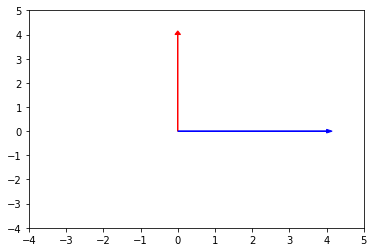

In [16]:
# creating two vectors that are perpindiular to each other! 
import matplotlib.pyplot as plt

vector1 = [0,4]
vector2 = [4,0]
plt.arrow(0,0, vector1[0], vector1[1], head_width=.15, head_length=.15, color='red')
plt.arrow(0,0, vector2[0], vector2[1], head_width=.15, head_length=.15, color='blue')
plt.xlim(-4,5)
plt.ylim(-4,5)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [13]:
# creating a function that will check if it is orthogonal

def find_orthogonal(var1, var2):
  # gettting the dot values to subtract! 
  dot = var1.dot(var2)
  # Making a if statment that checks if the two dot values return 0
  if dot == 0:
    orth = True
    return orth
  else: 
    orth = False
    return orth

# Now declaring my data frame
check = pd.DataFrame({'a':[-5,3,7],
                      'b':[6,-8,2]})

# Checking if they are Orthagonal
find_orthogonal(check['a'], check['b'])

False

## Vectors A and B are **NOT** orthogonal! 


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [14]:
# importing linalg from numpy
from numpy import linalg as LA

c = np.array([2,-15,6,20])
# Getting the norm squared of c
norm_sqr = (LA.norm(c))**2

# Getting the dot value of c
c_dot = c.dot(c)

# Getting the transpose * c
c_trans = np.transpose(c) * c

print('The ||c||^2 is: ', norm_sqr)
print("c's dot value is: ", c_dot)
print("The transpose * c is: ", c_trans)

The ||c||^2 is:  665.0
c's dot value is:  665
The transpose * c is:  [  4 225  36 400]


## The norm square is the same as the dot value! 

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
d = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \\0 \end{bmatrix} + -8\begin{bmatrix} 0 \\  0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [23]:
# assigning f
f = np.array([4,12,11,9,2])

# Now getting the norm of the vector
f_norm = LA.norm(f)

# Now multiplying f by 1/norm to get the unit vector
unit_vec = (1/f_norm)*f

# Displaying F as a unit vector and showing it's norm
print(unit_vec)
LA.norm(unit_vec)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


0.9999999999999999

In [24]:
# Turning that block of code into a function for practice 

def get_unit_vector(data):
  # Checking if the list going in is a numpy array
  data = np.array(data)
  # Getting the norm of the vector
  data_norm = LA.norm(data)
  # The function will return the result of the 1 over the norm multiplied by the data. (unit vector)
  return (1/data_norm)*data

get_unit_vector(f)

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

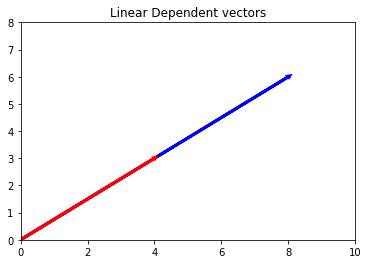

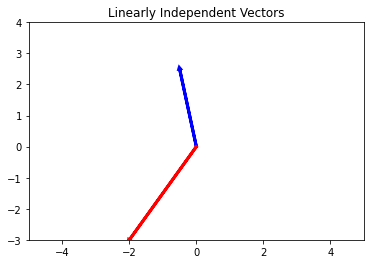

In [34]:
# Naming my vector
vec = [4,3]

# Scaling the vector to keep it dependent 
vec2 = np.multiply(2, vec)

# setting my x and y lims
plt.xlim(0,10)          
plt.ylim(0,8)

# Plotting the vectors 
plt.arrow(0,0, vec2[0], vec2[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, vec[0], vec[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.title('Linear Dependent vectors')
plt.show()


# Now plotting two linear independent vectors 
plt.xlim(-5,5)          
plt.ylim(-3,4)

# Original Vector
a = [-.5,2.5] 
b = [-2, -3]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

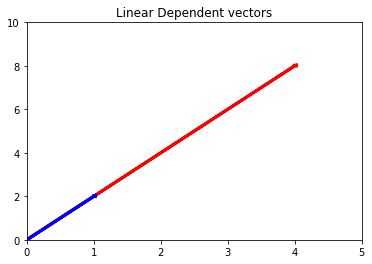

In [36]:
g = [1,2]
h = [4,8]

# setting my x and y lims
plt.xlim(0,5)          
plt.ylim(0,10)

# Plotting the vectors 
plt.arrow(0,0, h[0], h[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, g[0], g[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.title('Linear Dependent vectors')
plt.show()

print('The span is: 1 dimensional')

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [14]:
# The span of [l,m,n] is 3 dimensional

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections (STRETCH GOAL)

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

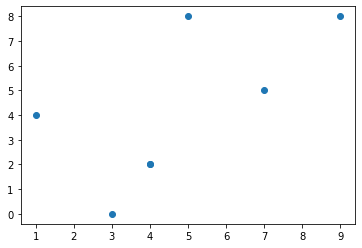

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()